# Dynamic Network Analysis of Enron Email Network Comparisons

In [263]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import random
from scipy.signal import *
from numpy.linalg import *
from sklearn.decomposition import *
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
#plotting parameters
%matplotlib inline
sns.set(style="whitegrid", color_codes=True, context='paper')
plt.rc('axes', grid=False, titlesize='large', labelsize='large',labelweight='heavy')
plt.rc('lines', linewidth=4)
plt.rc('font',family='serif',size=16, serif='Georgia Pro')
plt.rc('figure', figsize = (15,6),titlesize='large',titleweight='heavy')
plt.rc('grid',linewidth=5)
sns.set_palette(sns.husl_palette(20, h=0.8,l=0.5))

In [2]:
lap = pd.read_excel('enron_dynet_attvol_lap.xlsx')
adj = pd.read_excel('enron_dynet_attvol_adj.xlsx')
mod = pd.read_excel('enron_dynet_attvol_mod.xlsx')

In [44]:
lap.head()

AvgDeg  AvgCloseness    AvgBet    AvgEig   AvgKatz   AvgLoad  \
Nov98   0.142857      0.192308  0.125000  0.188611  0.185435  0.125000   
Dec98   0.145455      0.242737  0.086869  0.198999  0.175111  0.086869   
jan_99  0.083333      0.117057  0.076923  0.132902  0.057692  0.076923   
feb_99  0.500000      0.555556  0.333333  0.569036  0.390223  0.333333   
mar_99  0.200000      0.259259  0.166667  0.275965  0.277684  0.166667   

         Density  AvgClustCoef  AlgebraicConnect  MeanKurv    ...      \
Nov98   0.250000      0.000000               1.0 -0.196247    ...       
Dec98   0.218182      0.246465               1.0 -0.199212    ...       
jan_99  0.153846      0.000000               1.0 -0.206795    ...       
feb_99  0.666667      0.000000               1.0 -0.058750    ...       
mar_99  0.333333      0.000000               1.0 -0.157405    ...       

        InstAccel  cosInstPhase         IAwIF     IAwIP  MeanResistanceDist  \
Nov98   -0.048538      0.369891 -2.164452e-01  0.345301            1.603840   
Dec98   -0.012273      0.210647  1.753912e+00  1.255140            1.804050   
jan_99  -0.144891      0.149447  9.562196e-01  2.265634            1.751267   
feb_99  -0.451282      0.667721 -1.233581e-17  2.714095            0.990468   
mar_99  -0.279494      0.550674  1.049833e+00  1.703481            1.478780   

         StatRat  LogKPCARatio  NormNMFRatio  SubgraphStat  Emergence  
Nov98   0.894427      0.000000      0.000000      0.000000   0.000000  
Dec98   0.908295     -0.310794      1.478061      0.014443   0.447999  
jan_99  0.930949      0.538398      0.895689      0.015320  -0.045322  
feb_99  0.774597     -1.051911      0.487906      0.011628   0.054747  
mar_99  0.866025      1.697420      1.318329      0.014423   0.155015  

[5 rows x 25 columns]

In [36]:
months = lap.index

# Is there a signal in this network?

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text yticklabel objects>)

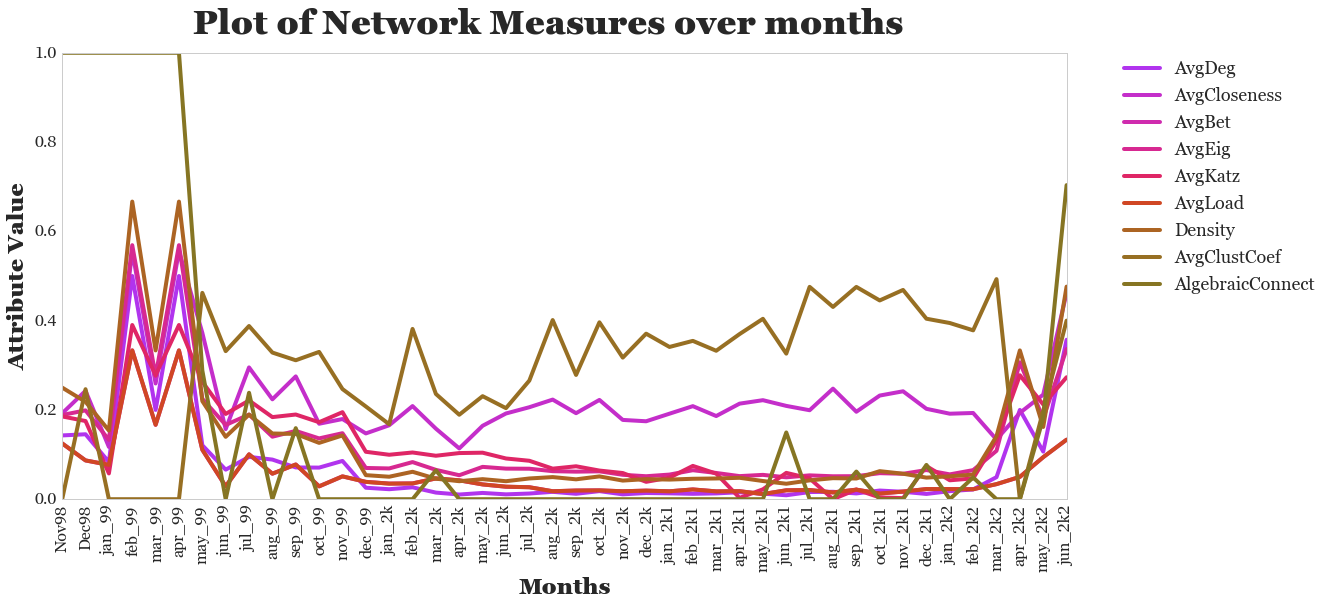

In [140]:
lap.iloc[:,:9].plot(fontsize=22, rot=90, figsize=(18,8))
plt.suptitle("Plot of Network Measures over months", fontsize=33)
plt.xlabel("Months", fontsize=22)
plt.ylabel("Attribute Value", fontsize=22)
plt.legend(fontsize=18, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(len(months)), months,fontsize=16)
plt.yticks(fontsize=16)

Clearly there is a discernable signal that emerges from the network measures as we see distinct peaks over Jan-Apr 99, July-Oct 99, Feb 2000, Apr 2002 onwards. The centrality and network measures suggest these are the greatest periods of change in the network over the time frame considered.

# Can we derive other measures for dynamic network analysis? 

## Yes we can!

I implemented some novel measures from seismic data analysis. They are based on the notion of the complex trace and on matrix decomposition. But the issue with matrix decomposition is there are a few different graph structural matrices to choose from such as the Laplacian, Adjacency and Modularity Matrix. Which of these are best for derivation of these attributes? 

The complex trace is defined as $$C(t) = S(t) + iH(t) $$
Where:

>$C(t)$= Complex Trace

>$S(t)$= Real Data

>$H(t)$= Hilbert Transform of data 

Complex Trace Attributes:

1. Instantaneous Amplitude, IA   $$\sqrt{S(t)^2 + H(t)^2}$$
2. Instantaneous Phase, IP   $$\arctan(\frac{H(t)}{S(t)})$$
3. Instantatneous Frequency, IF $$\frac{\mathrm d}{\mathrm d t} \big( IP) \big)$$
4. Derivative of IA   $$\frac{\mathrm d}{\mathrm d t} \big( IA \big)$$
5. 2nd Derivative of IA   $$\frac{\mathrm d^2}{\mathrm d t^2} \big( IA \big)$$
6. Instantaneous Acceleration, IAcc $$\frac{\mathrm d}{\mathrm d t} \big( IF \big)$$
7. Amplitude Weighted Instantaneous Phase $$IA*IP$$
8. Amplitude Weighted Instantaneous Frequency $$IA*IF$$

Attributes from the graph matrices:

+ Gaussian Curvature
+ Kernel PCA 3 Component Ratio Change
+ Resistane Distance
+ Stationarity Ratio
+ Norm NMF Ratio

## Instantaneous Amplitude, $\sqrt{S(t)^2 + H(t)^2}$

**Instantaneous Amplitude is widely used in traditional tectonic and stratigraphic interpretation. As one of the basic parameters of the amplitude attribute, it helps delineate the high- or low-amplitude anomaly (bright or dark spots). In this context this should highlight the bright and dark spots in the network when used as an attribute map and should show the highest and lowest points when used as a timeseries. As I show later this amplitude has a high correlation (> 0.7) with the traditional centrality measures so its behaviour is very similar to those. Therefore it is highly plausible that for this data it should suffice to look at this attribute instead of many different centrality measures. **


## Derivative of Instantanteous Amplitue, $\frac{\mathrm d}{\mathrm d t} \big( IA \big)$

**The derivative of IA highlights the change in reflectivity and shows sharp interfaces and discontinuities. Effectively this should highlight the big changes in the IA and the smaller changes should make the attribute smooth. This is what we observe because the attribute highlights the peaks observed in the IA plot and the rest of the signal is fairly smooth for the time range. **

## 2nd Derivative of Instantaneous Amplitude $\frac{\mathrm d^2}{\mathrm d t^2} \big( IA \big)$

**The second derivative of the IA highlights the interfaces very well - the places of change. This attribute is not too sensitive to the amplitude and can highlight even weak events.We see this to be the case where the first derivative highlights the individual peaks the second derivative smoothes the individual peaks and gives a smooth peak over the range of months where they occur and does a better job of highlighting the peaks towards the end of the timeseries than the first derivative. **

## Instantaneous Phase, $\arctan(\frac{H(t)}{S(t)})$

**Instantaneous Phase is expressed in degrees or radians at the selected sampling point. Instantaneous phase helps strengthen weak reflections in the inner parts of reservoirs and also strengthens the noise. Because the hydrocarbon accumulation often causes phase changes, this attribute can be used as a direct indication of hydrocarbons. The cosine of the instantaneous phase is derived from the instantaneous phase. It is commonly used to improve the variation display of the instantaneous phase because it has fixed boundary values (-1 to +1). In this context the change in the IP can be used as an indicator for the itervals which are the most interesting since they have a noticeable phase change. This is better illustrated by the cosine of IP especially the percentage change plot here we see the months with the greatest phase change really well and the peaks are well delineated in constrast to the just the IP plot. **

## Instantaneous Frequency, $\frac{\mathrm d}{\mathrm d t} \big( IP) \big)$

**Instantaneous frequency is defined as the time derivative of the instantaneous phase and it is used for estimating seismic attenuation. Oil and gas reservoirs often cause the attenuation of high-frequency components, so this attribute is also conducive to measuring stratigraphic periodic intervals. In this context I expect this to show clearly the peaks of the signal. This is exactly what we see especially in the monthly trend where the two large peaks are clearly delineated with a some smaller peaks highlighted the attribute is smooth over the rest of the series. So it has the property of finding the most significant peaks in our data.**


## Instantaneous Acceleration, $\frac{\mathrm d}{\mathrm d t} \big( IF \big)$

**Instantaneous Acceleration is defined as the rate of change of the instantaneous frequency, which is often used to indicate the rate of attenuation and absorption. As gas (or oil, or water) can cause the attenuation of seismic waves, this attribute can represent a fluid interface in the high-resolution data. As a deriative attribute I expect it to highlight the peaks and troughs very effectively and be smooth in areas of less pronounced change. This is what is observed as the attribute highlights the two large peaks but with the opposite polarity of IF. **


## Amplitude Weighted IF

**Amplitude weighted Instantaneous Frequency provides a reliable smooth instantaneous frequency estimation in order to reduce the interference damage. I expcect this to better highlight frequency anomalies in the data and suppress insignificant anomalies. We see that the weighted IF is sharper in places where the IF is fairly smooth. This highlights the major peaks as well as minor anomalies not immediately obvious from the IF alone.**

## Amplitude weighted Instantaneous Phase

**The amplitude weighted IP should cause the phase to become sharper with the peaks and troughs more accentuated. This has the effect of magnifying the signal as well as the noise. However, in this case we see that the trend in IP weighted and regular IP plot are identical with the only difference being the magnitude of the peaks. **

## Mean Curvature

**There are many ways to define curvature I use the Gaussian Curvature which is derived from the Hessian Matrix. A surface might be curved upward in places, curve downward in places, or even be flat in places. Also, at some given point, the surface may be curved upward in some directions and downward in others. The curvature measure helps us detect such change. Gaussian curvature can be positive, negative, or zero. A useful property of the curvature attribute is that it is independent of orientation of the surface. If we place vectors on this surface the would indicates where the curve bends i.e., the vectors are either diverging, converging, or parallel. This can correspond to the negative, positive or zero value of curvature.**

$$K = \frac{f_{xx}f_{yy}+f_{xy}f_{yx}}{(1+ f_x^2 + f_y^2)^2}$$ 

**The mean curvature is the trace of the eigenvalues of the Hessian Matrix $$K_{mean} = tr(\lambda_{hessian}) $$ **


## Kernel PCA 3 Components Ratio

**Here I calculate the Kernel PCA 3 Component ratio from the Normalised Graph Laplacian. This is the ratio of the main element difference between two networks. The reason a Kernel PCA is used is because of its ability to handle non-linearity through kernels. Here the RBF kernel is used to fit the Normalised Graph Laplacian and then the ratio is calculated as follows:**

**Step 1: Fit and transform the Normalised Graph Laplacian keeping only the first 3 compoenets: PC1, PC2 and PC3**

**Step 2: Calculate the Kernel PCA Ratio, $$KPCA_{r} = \frac{PC1-PC3}{PC1-PC2}$$**

**Step 3: For all the networks calculate the change in the KPCA Ratio as $$\delta K_{r} =\frac{K_{rt0}}{K_{rt1}}$$ recursively to derive a rolling measure of the change in KLPCA Ratio over time.**

**The KLPCA is one of the main element analysis methods in seismic attribute analysis where it is used to calculate the  correlation in a multitrace window. A small value represents a degree of intermittent or no correlation of geological phenomena. It is also used to detect discontinuities, such as faults and unconformities. Here the purpose is to locate big discontinuities in our networks over time. This represents a scalalble and easy way to locate the biggest changes even when we are dealing with a large number of dynamic networks. Most of the values encountered are relatively small. But from the monthly plot we see that there is a large discontinuity in June and July 1999 whose scale dominates the plot. Hence the log of this attribute is used and we see other smaller signals emerge as a result. **

## Norm NMF Ratio

**This is another metric derived from the Non-negative Matrix Factorisation of the graph matrix. Essentially the graph matrix is decomposed and then I take the Frobenius norm of the result to derive a measure of comparison of the networks at different times. **

## Resistance Distance

**The resistance distance between vertices i and j of a graph G is defined as the effective resistance between the two vertices (as when a battery is attached across them) when each graph edge is replaced by a unit resistor. This resistance distance is a metric on graphs.**

**I calculate the resistance distance as:**

>M =Graph Matrix

>N = Length of M

>P = Moore-Penrose Pseudo Inverse of M

>D = The diagonal of Pinv

$$R_d = (D \otimes (N,1))^T + (D \otimes (N,1))^T - P - P^T $$

Here $\otimes$ denotes the Kronecker or outer product

## Stationarity Ratio

**The Stationarity Ratio is based on the SVD decomposition of the graph matrix and then calculated as a ratio of the norm of the diagonal elements to the norm of the  derived matrix. This is calculated as follows:**

> L = graph matrix 

> U = eigenvalues of L

> C = covariance of L

$$CF = L \odot (U^T \odot C \odot U)$$

$$S_r = \frac{\|diag(CF) \|}{\|CF \|} $$
  
## Subgraph Stationarity, $\zeta$

**This is computed from the adjacency matrix of graphs and is done in two steps. Essentially this is comparing the common subraphs between two networks and deriving a correlation score. This is done in two steps.**

>Step 1: Calculate Correlation, Ct between the graphs at time, t and time, t+1.

$$C(t) = \frac{A(t)\cap A(t+1}{A(t) \cup A(t+1)}$$

>Step 2: Calculate the Subgraph Stationarity, $\zeta$
$$\zeta = \frac{\sum_{t=0}^{tmax-1} C(t,t+1)}{tmax-t0-1}$$

>From the Subgraph Stationariy $\zeta$ we can calculate the amount of members that change at each time step as $$1- \zeta$$

## Persistence and Emergence

**This is comprehensive measure that allows all the above measures to be combined into a single measure for network characterisation. **

>At the very beginning timestep where t = 1oratany timestep when both Pi,t and Pi,t−1 are zero, Emergence is equal to 0, which indicates a neutral change.When t is larger than 1 and max{Pi,t, Pi,t−1} ?= 0, it is defined to be the normalized change of Persistence at the most recent timesteps. Depending on whether the Persistence contains negative values, normalization terms are defined differently.

Ref:

[1]	W. Wei and K. M. Carley, “Measuring Temporal Patterns in Dynamic Social Networks,” ACM Trans. Knowl. Discov. Data, vol. 10, no. 1, pp. 1–27, 2015.

In [75]:
att_only = lap.iloc[:,9:].join(adj.iloc[:,9:],rsuffix='Adj').join(mod.iloc[:,9:],rsuffix='Mod')
att_only.sortlevel(axis=1, inplace=True);

In [20]:
snr_lap = lap.iloc[:,9:].mean()/lap.iloc[:,9:].std()
snr_adj = adj.iloc[:,9:].mean()/adj.iloc[:,9:].std()
snr_mod = mod.iloc[:,9:].mean()/mod.iloc[:,9:].std()

snr_all = pd.DataFrame([snr_lap,snr_mod,snr_adj]).T
snr_all.columns = ['Laplacian','Modularity','Adjacency']

# So which ones are good?

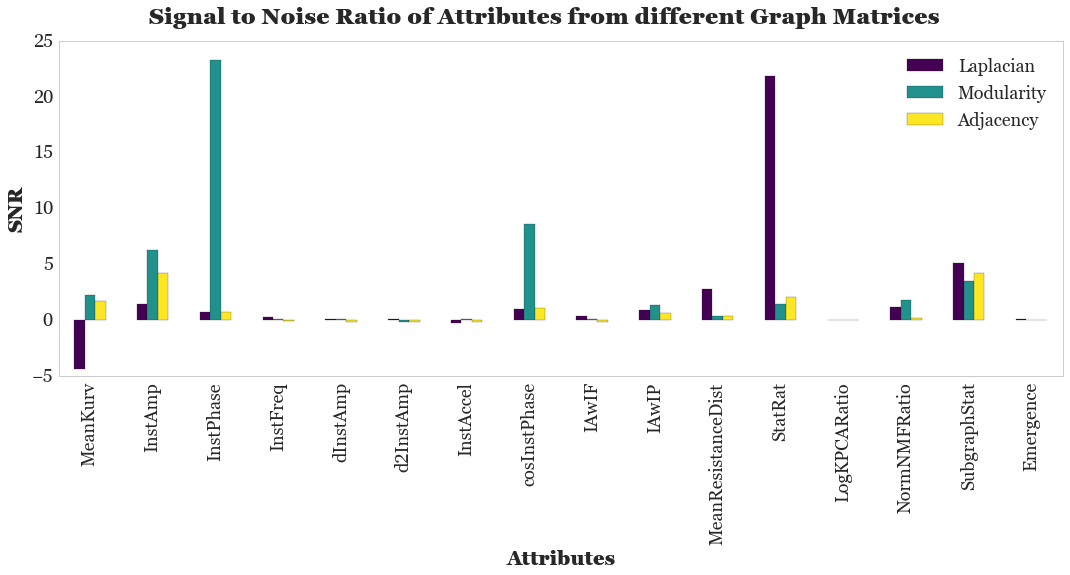

In [101]:
snr_all.plot(kind='bar', fontsize=18,figsize=(18,6), cmap='viridis')
plt.suptitle('Signal to Noise Ratio of Attributes from different Graph Matrices', fontsize=22)
plt.xlabel('Attributes')
plt.ylabel('SNR')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 9 Text yticklabel objects>)

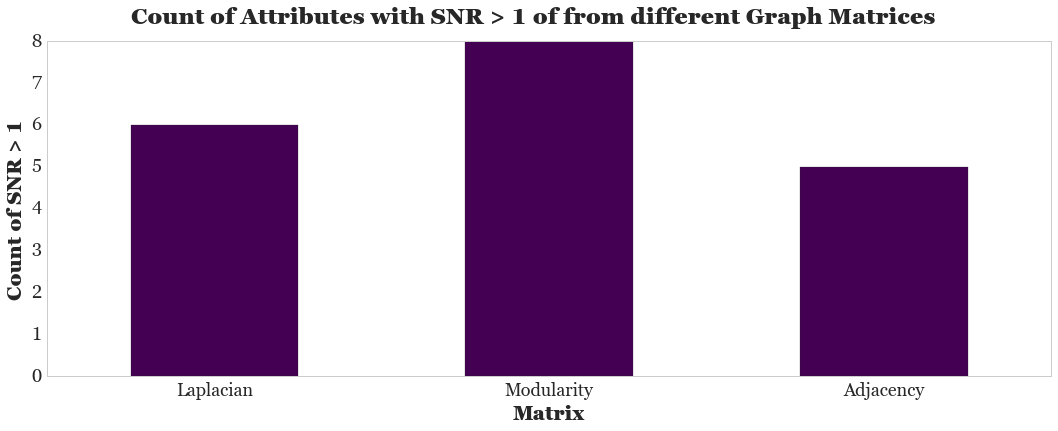

In [122]:
snr_all[snr_all > 1].count().plot.bar( fontsize=18,figsize=(18,6), legend=False, rot=0, cmap='viridis')
plt.suptitle('Count of Attributes with SNR > 1 of from different Graph Matrices', fontsize=22)
plt.xlabel('Matrix')
plt.ylabel('Count of SNR > 1')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

In [130]:
att_only.columns

Index(['Emergence', 'EmergenceAdj', 'EmergenceMod', 'IAwIF', 'IAwIFAdj',
       'IAwIFMod', 'IAwIP', 'IAwIPAdj', 'IAwIPMod', 'InstAccel',
       'InstAccelAdj', 'InstAccelMod', 'InstAmp', 'InstAmpAdj', 'InstAmpMod',
       'InstFreq', 'InstFreqAdj', 'InstFreqMod', 'InstPhase', 'InstPhaseAdj',
       'InstPhaseMod', 'LogKPCARatio', 'LogKPCARatioAdj', 'LogKPCARatioMod',
       'MeanKurv', 'MeanKurvAdj', 'MeanKurvMod', 'MeanResistanceDist',
       'MeanResistanceDistAdj', 'MeanResistanceDistMod', 'NormNMFRatio',
       'NormNMFRatioAdj', 'NormNMFRatioMod', 'StatRat', 'StatRatAdj',
       'StatRatMod', 'SubgraphStat', 'SubgraphStatAdj', 'SubgraphStatMod',
       'cosInstPhase', 'cosInstPhaseAdj', 'cosInstPhaseMod', 'd2InstAmp',
       'd2InstAmpAdj', 'd2InstAmpMod', 'dInstAmp', 'dInstAmpAdj',
       'dInstAmpMod'],
      dtype='object')

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text yticklabel objects>)

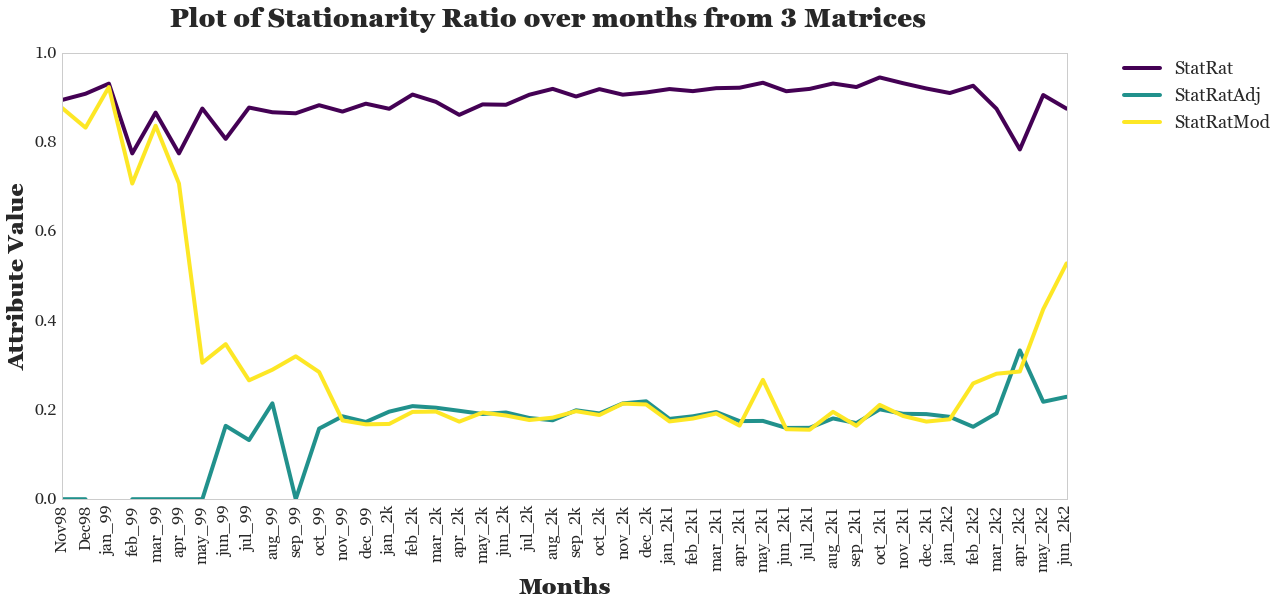

In [146]:
att_only.iloc[:,33:36].plot.line(fontsize=22, rot=90, figsize=(18,8), cmap='viridis')
plt.suptitle("Plot of Stationarity Ratio over months from 3 Matrices", fontsize=25)
plt.xlabel("Months", fontsize=22)
plt.ylabel("Attribute Value", fontsize=22)
plt.legend(fontsize=18, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(len(months)), months,fontsize=16)
plt.yticks(fontsize=16)

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7]),
 <a list of 8 Text yticklabel objects>)

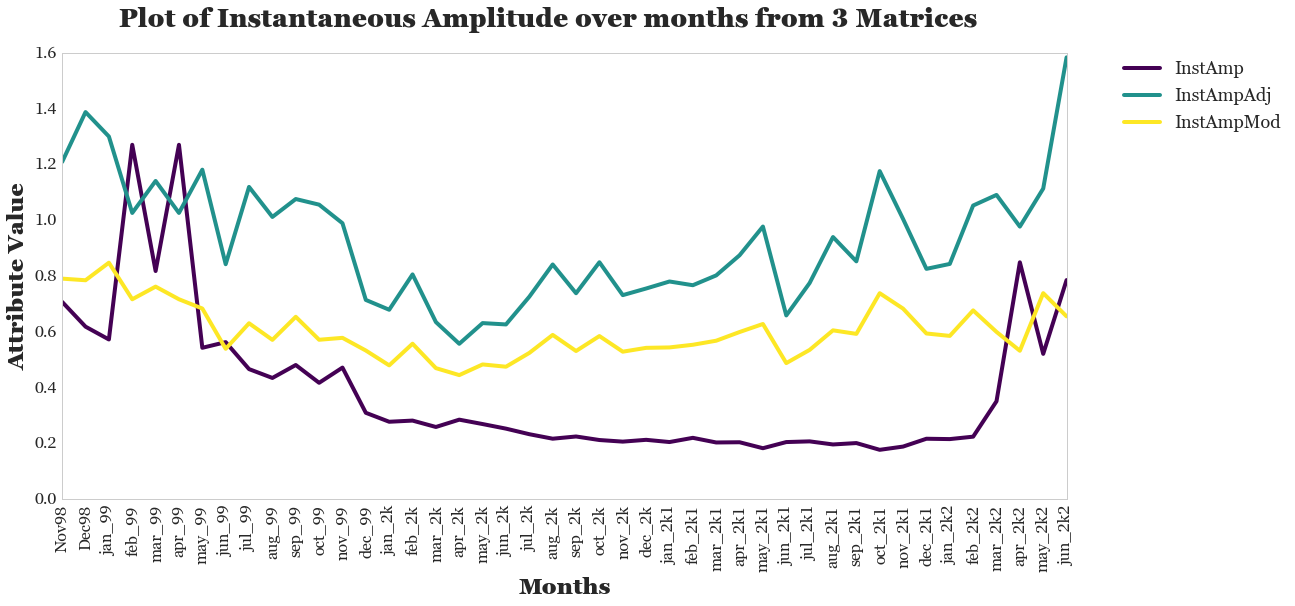

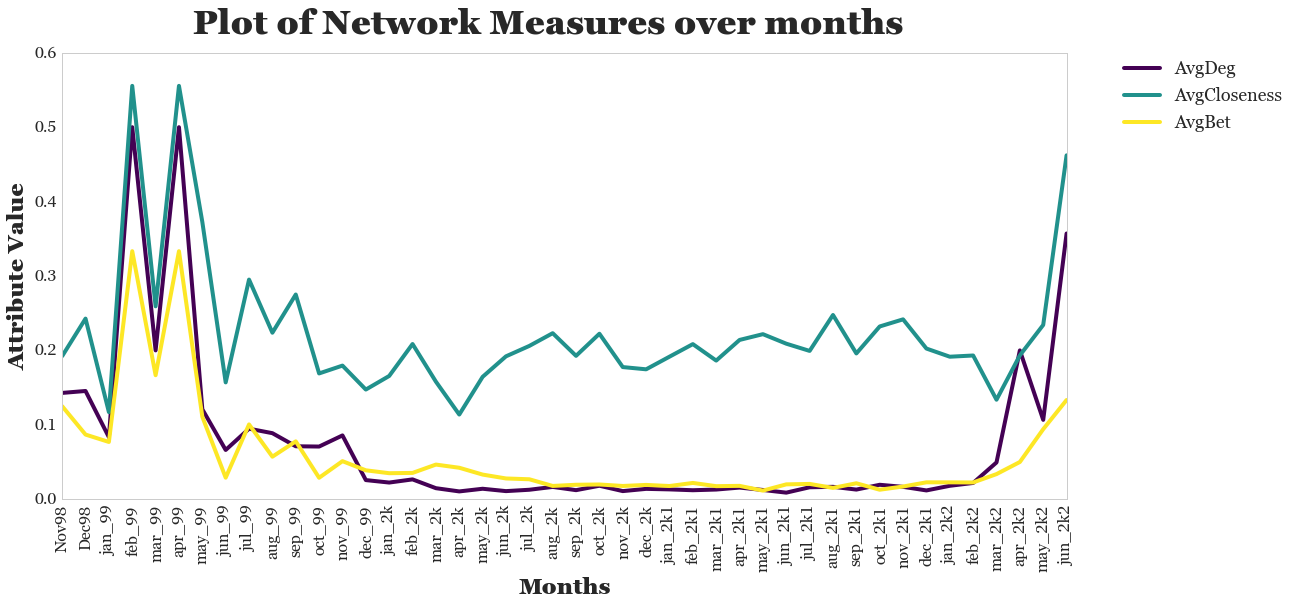

In [153]:

att_only.iloc[:,12:15].plot.line(fontsize=22, rot=90, figsize=(18,8), cmap='viridis')
plt.suptitle("Plot of Instantaneous Amplitude over months from 3 Matrices", fontsize=25)
plt.xlabel("Months", fontsize=22)
plt.ylabel("Attribute Value", fontsize=22)
plt.legend(fontsize=18, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(len(months)), months,fontsize=16)
plt.yticks(fontsize=16)

lap.iloc[:,:3].plot(fontsize=22, rot=90, figsize=(18,8), cmap='viridis')
plt.suptitle("Plot of Network Measures over months", fontsize=33)
plt.xlabel("Months", fontsize=22)
plt.ylabel("Attribute Value", fontsize=22)
plt.legend(fontsize=18, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(len(months)), months,fontsize=16)
plt.yticks(fontsize=16)

**It seems that high SNR variables are not what we need. The Modularity matrix has more robust measures but the Laplacian attributes capture the trend in the data well. So actually the attributes we want should have high variance to capture this variability. **

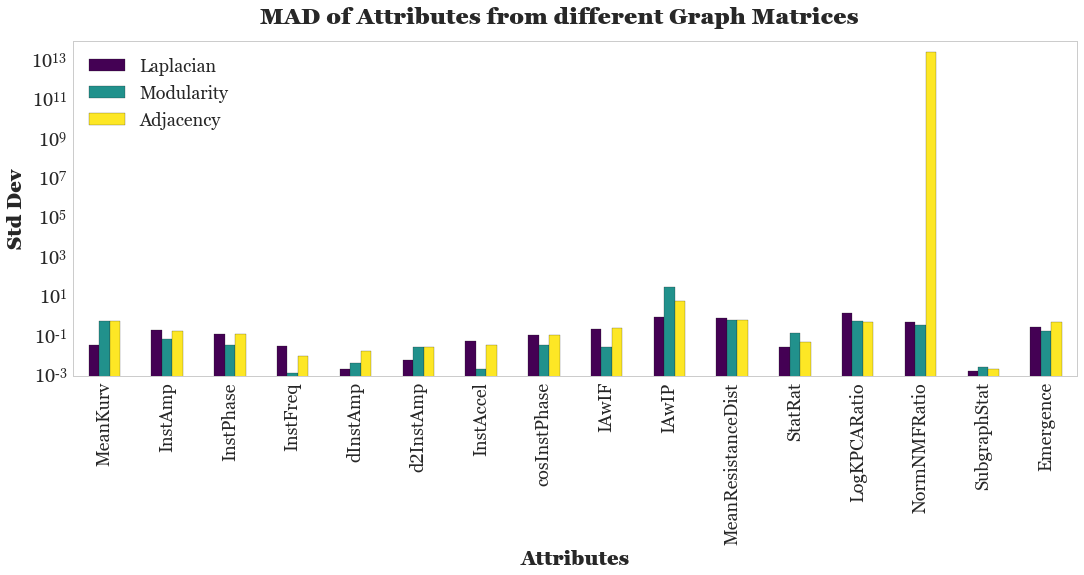

In [171]:
mad_lap = lap.iloc[:,9:].mad()
mad_adj = adj.iloc[:,9:].mad()
mad_mod = mod.iloc[:,9:].mad()

mad_all = pd.DataFrame([mad_lap,mad_mod,mad_adj]).T
mad_all.columns = ['Laplacian','Modularity','Adjacency']

mad_all.plot(kind='bar', fontsize=18,figsize=(18,6), cmap='viridis', logy=True)
plt.suptitle('MAD of Attributes from different Graph Matrices', fontsize=22)
plt.xlabel('Attributes')
plt.ylabel('Std Dev')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc=2,fontsize=18)


In [172]:
mad_all  = mad_all.T
mad_all.drop(['NormNMFRatio'],axis=1,inplace=True)
mad_all  = mad_all.T

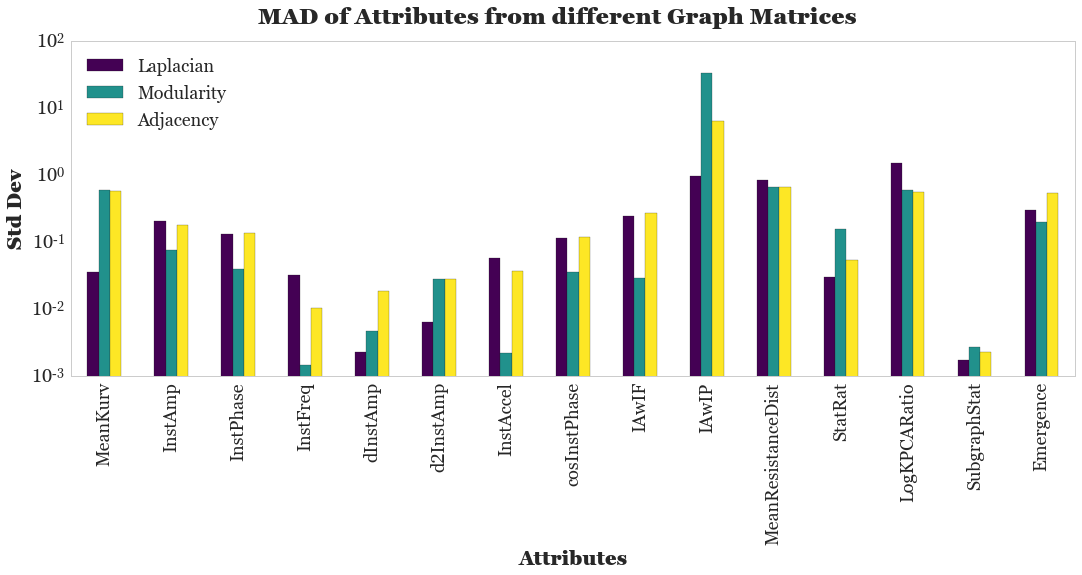

In [177]:
mad_all.plot(kind='bar', fontsize=18,figsize=(18,6), cmap='viridis', logy=True)
plt.suptitle('MAD of Attributes from different Graph Matrices', fontsize=22)
plt.xlabel('Attributes')
plt.ylabel('MAD')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc=2,fontsize=18)

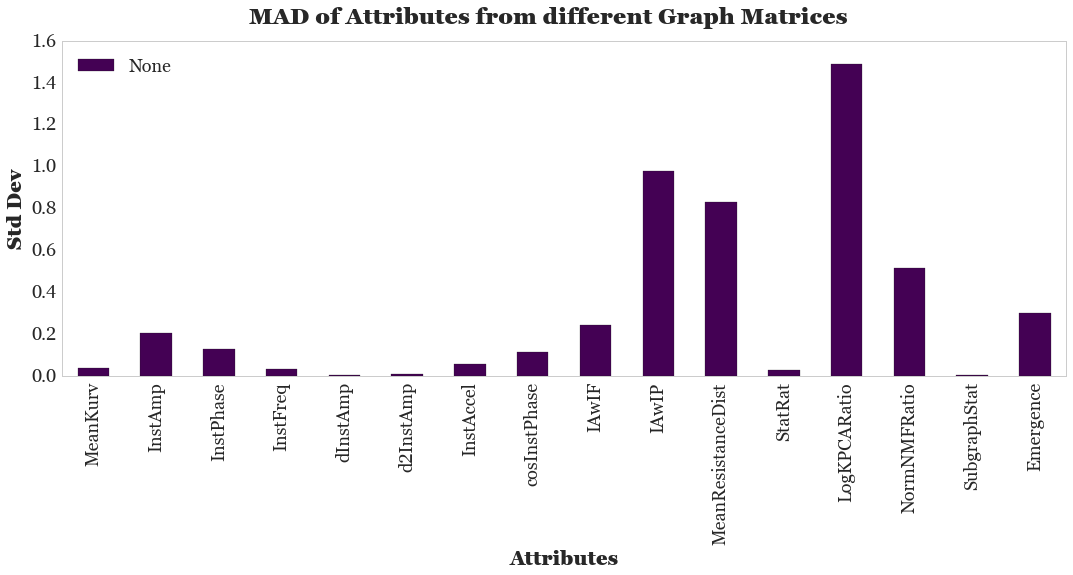

In [179]:
mad_lap.plot(kind='bar', fontsize=18,figsize=(18,6), cmap='viridis')
plt.suptitle('MAD of Attributes from different Graph Matrices', fontsize=22)
plt.xlabel('Attributes')
plt.ylabel('MAD')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc=2,fontsize=18)

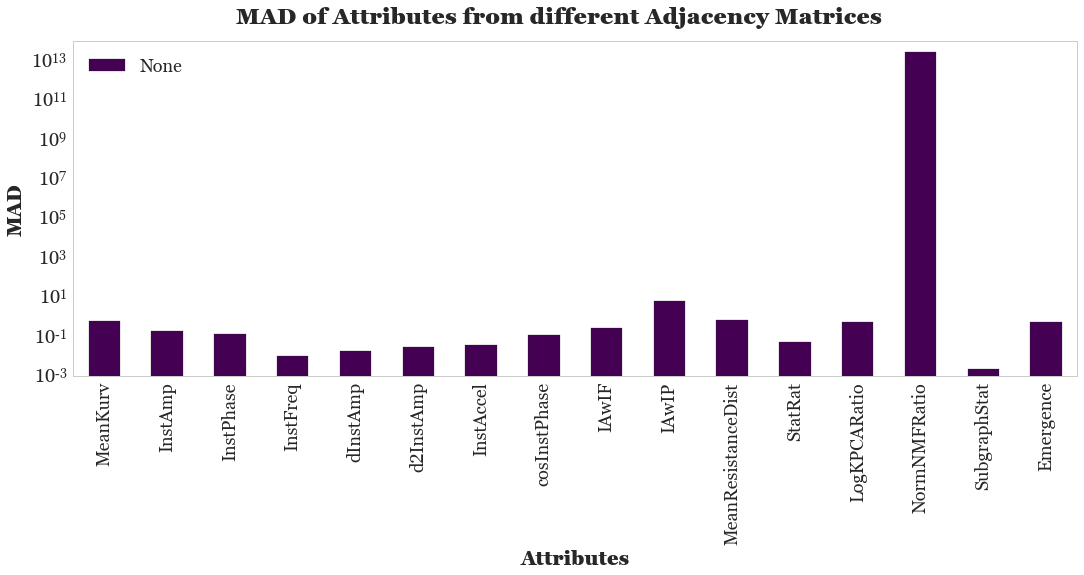

In [252]:
mad_adj.plot(kind='bar', fontsize=18,figsize=(18,6), cmap='viridis', logy=True, legend=False)
plt.suptitle('MAD of Attributes from different Adjacency Matrices', fontsize=22)
plt.xlabel('Attributes')
plt.ylabel('MAD')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc=2,fontsize=18)

(array([  1.00000000e-04,   1.00000000e-03,   1.00000000e-02,
          1.00000000e-01,   1.00000000e+00,   1.00000000e+01,
          1.00000000e+02,   1.00000000e+03]),
 <a list of 8 Text yticklabel objects>)

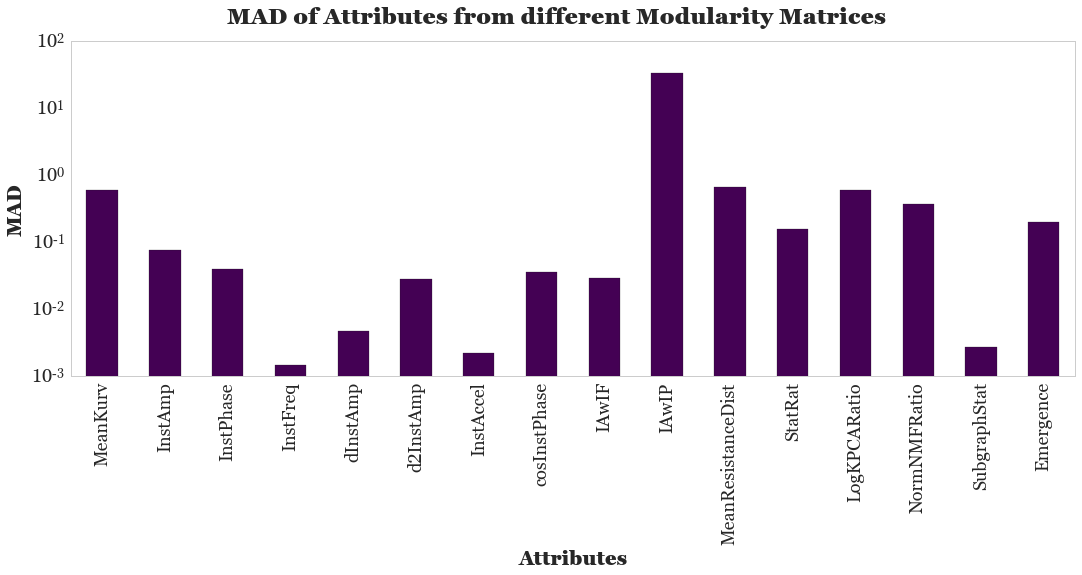

In [254]:
mad_mod.plot(kind='bar', fontsize=18,figsize=(18,6), cmap='viridis', legend=False, logy=True)
plt.suptitle('MAD of Attributes from different Modularity Matrices', fontsize=22)
plt.xlabel('Attributes')
plt.ylabel('MAD')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


** It seems Laplacian derived attributes are most numerically stable and less prone to blowing up. **

In [241]:
corrmat = att_only.corr()

threshold = 0.7
corrmat.values[np.where(abs(corrmat.values) < threshold)] = 0

g = sns.dendrogram(corrmat);
plt.close()

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
         27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
         36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,
         45.5,  46.5,  47.5]), <a list of 48 Text yticklabel objects>)

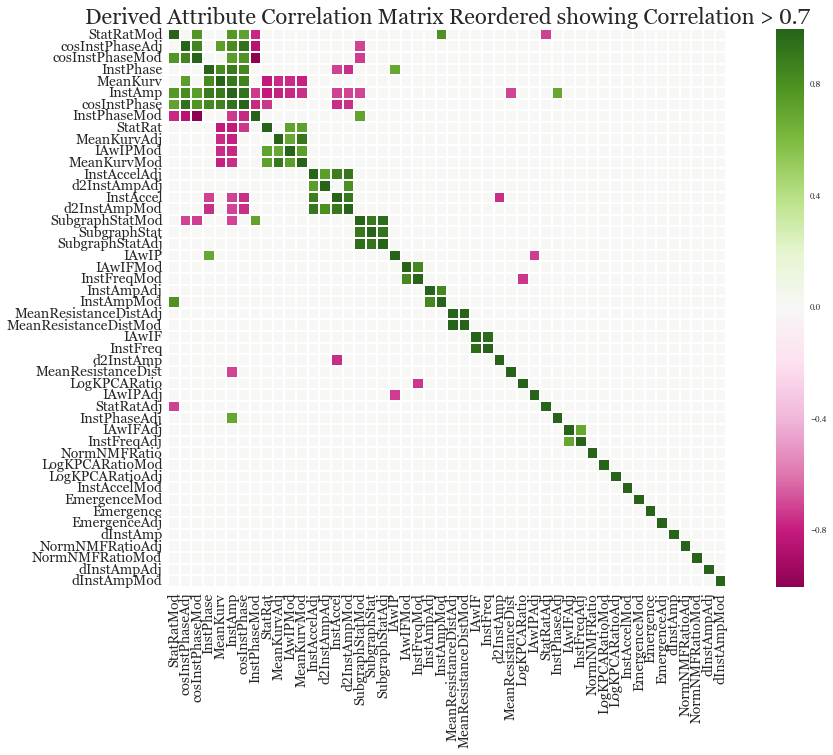

In [244]:
plt.figure(figsize=(18,10))
sns.heatmap(corrmat.iloc[g.reordered_ind, g.reordered_ind], cmap='PiYG',robust=True, fmt='d', linewidths=1, square=True)
plt.title("Derived Attribute Correlation Matrix Reordered showing Correlation > 0.7", fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [247]:
all_att_df = lap.iloc[:,:9].join(att_only)

corrmat_all = all_att_df.corr()
corrmat_all.values[np.where(abs(corrmat_all.values) < threshold)] = 0

g1 = sns.dendrogram(corrmat_all);
plt.close()

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
         27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
         36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,
         45.5,  46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,  53.5,
         54.5,  55.5,  56.5]), <a list of 57 Text yticklabel objects>)

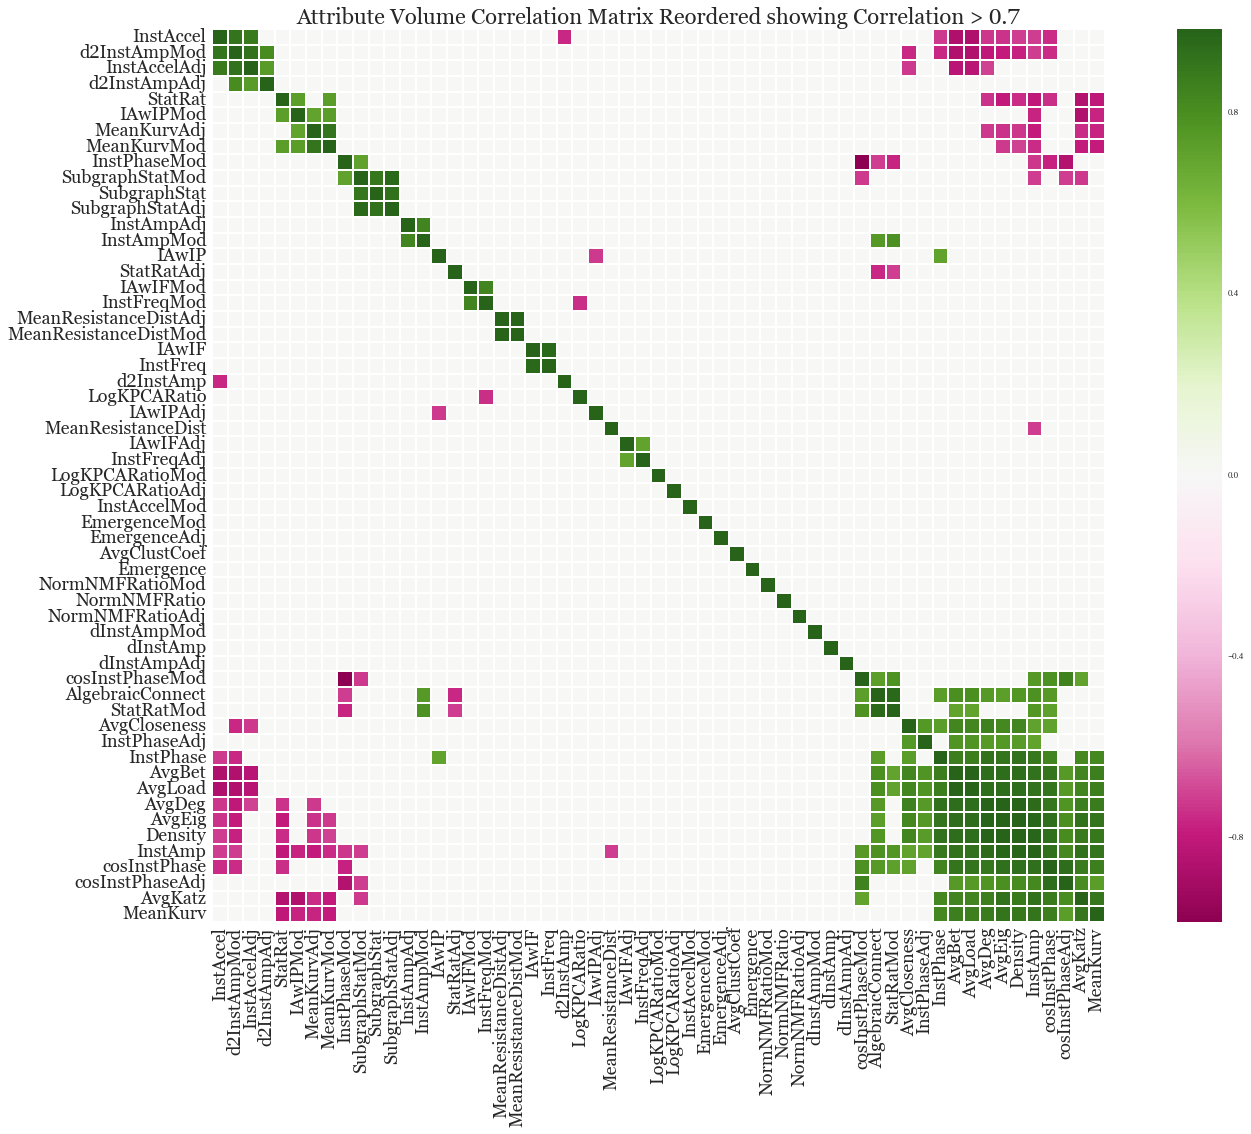

In [248]:
plt.figure(figsize=(26,16))
sns.heatmap(corrmat_all.iloc[g1.reordered_ind, g1.reordered_ind], cmap='PiYG',robust=True, fmt='d', linewidths=1, square=True)
plt.title("Attribute Volume Correlation Matrix Reordered showing Correlation > 0.7", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

In [249]:
corrmat_lap = lap.corr()
corrmat_lap.values[np.where(abs(corrmat_lap.values) < threshold)] = 0
g2 = sns.dendrogram(corrmat_lap);
plt.close()

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5]),
 <a list of 25 Text yticklabel objects>)

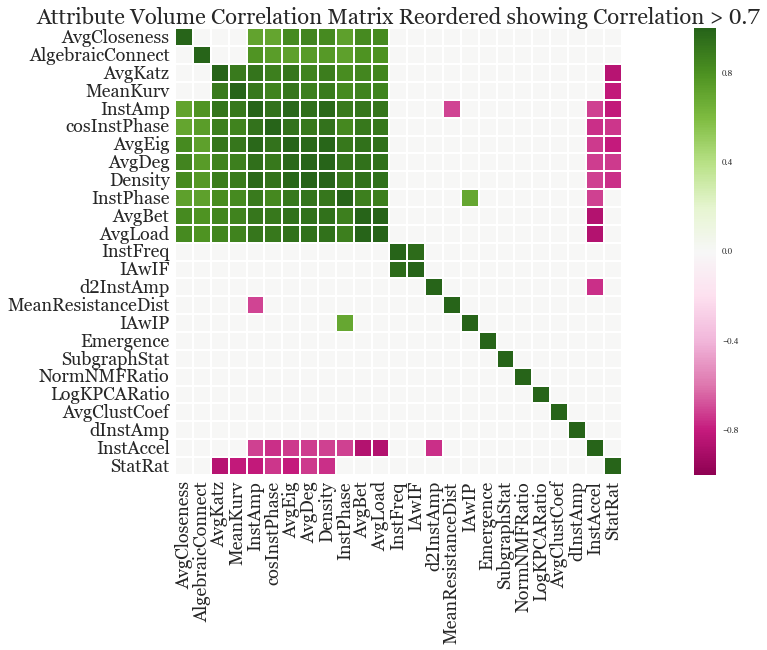

In [251]:
plt.figure(figsize=(26,8))
sns.heatmap(corrmat_lap.iloc[g2.reordered_ind, g2.reordered_ind], cmap='PiYG',robust=True, fmt='d', linewidths=1, square=True);
plt.title("Attribute Volume Correlation Matrix Reordered showing Correlation > 0.7", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

(array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5]),
 <a list of 6 Text yticklabel objects>)

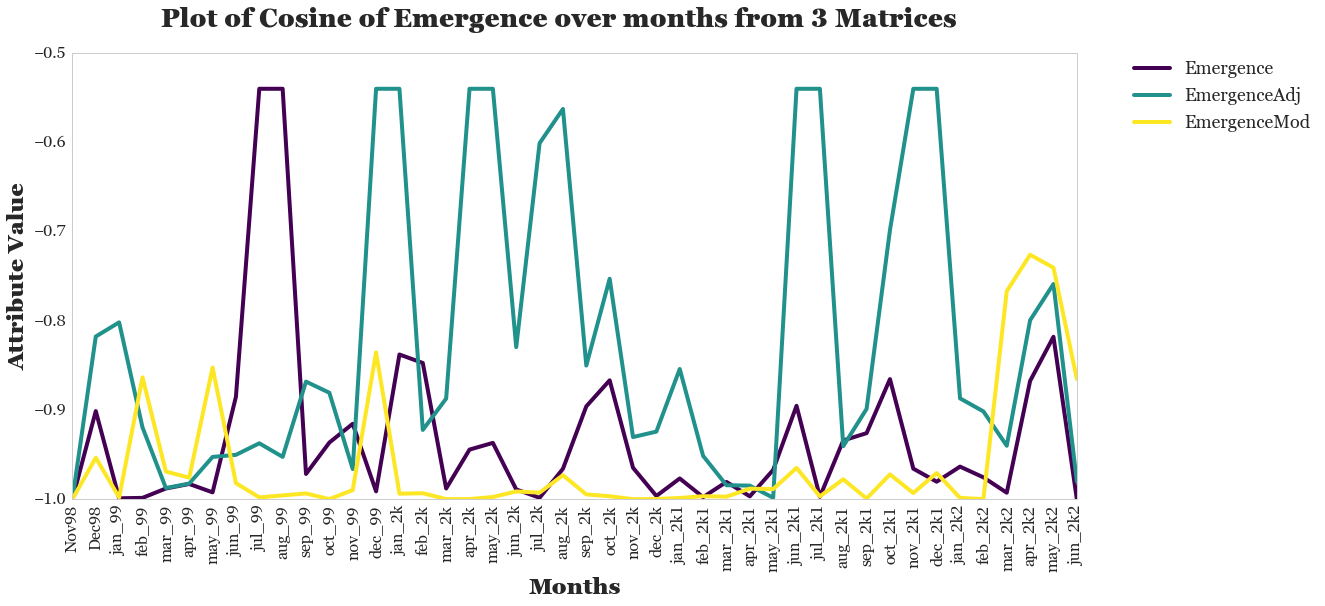

In [262]:
att_only.iloc[:,:3].apply(lambda x: np.cos(x)*-1).plot.line(fontsize=22, rot=90, figsize=(18,8), cmap='viridis')
plt.suptitle("Plot of Cosine of Emergence over months from 3 Matrices", fontsize=25)
plt.xlabel("Months", fontsize=22)
plt.ylabel("Attribute Value", fontsize=22)
plt.legend(fontsize=18, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(len(months)), months,fontsize=16)
plt.yticks(fontsize=16)

In [264]:
X= lap.drop(['AvgDeg'],axis=1).apply(lambda x: sc.stats.zscore(x), axis=1)
y = lap.AvgDeg
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.5)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [265]:
params = {'n_estimators': 10, 'max_depth': 10, 'min_samples_split': 10,
          'learning_rate': 0.1, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=10, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=10, presort='auto',
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

(array([   0.,   20.,   40.,   60.,   80.,  100.]),
 <a list of 6 Text xticklabel objects>)

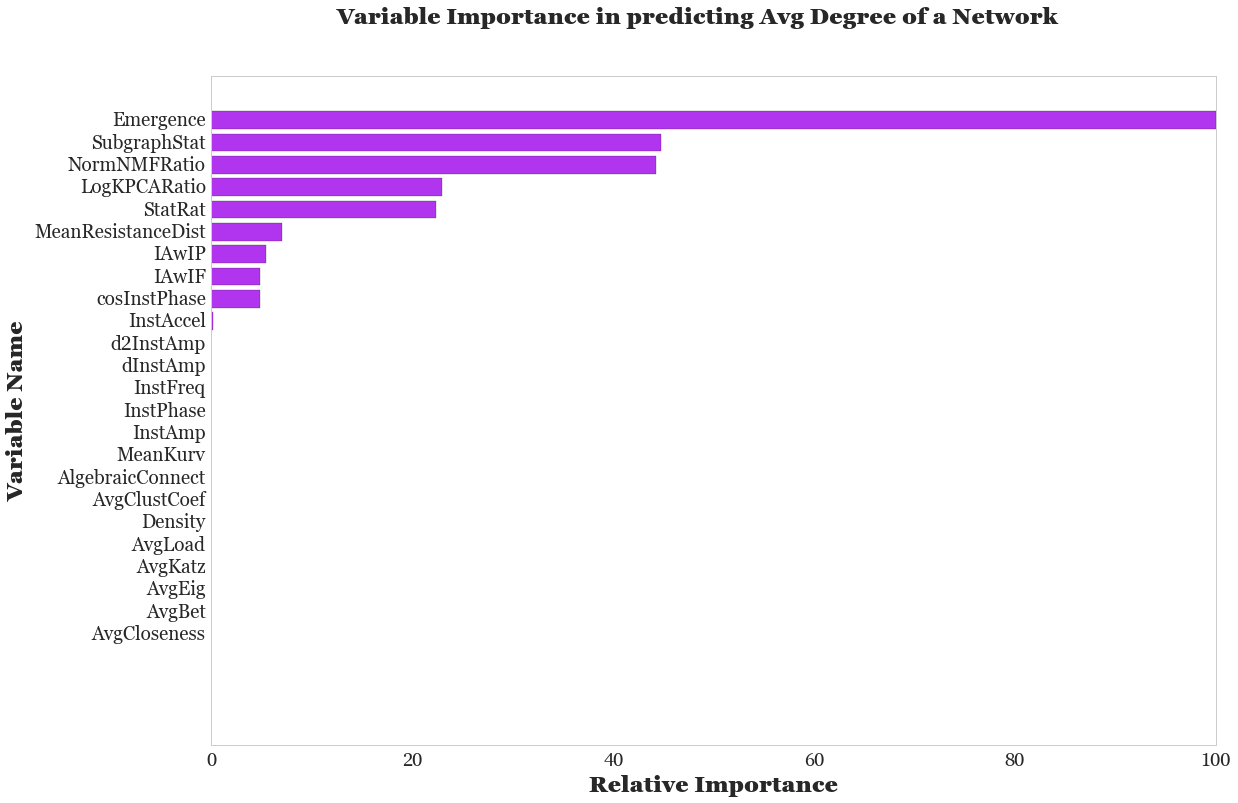

In [266]:
feature_importance = clf.feature_importances_

# make importances relative to max importance
plt.figure(figsize=(18,12))
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X)
pos = np.arange(sorted_idx.shape[0])
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names, fontsize=19)
plt.ylabel("Variable Name", fontsize=22)
plt.xlabel('Relative Importance', fontsize=22)
plt.suptitle('Variable Importance in predicting Avg Degree of a Network', fontsize=22)
plt.xticks(fontsize=18)

(array([ 0.002,  0.004,  0.006,  0.008,  0.01 ,  0.012,  0.014,  0.016]),
 <a list of 8 Text yticklabel objects>)

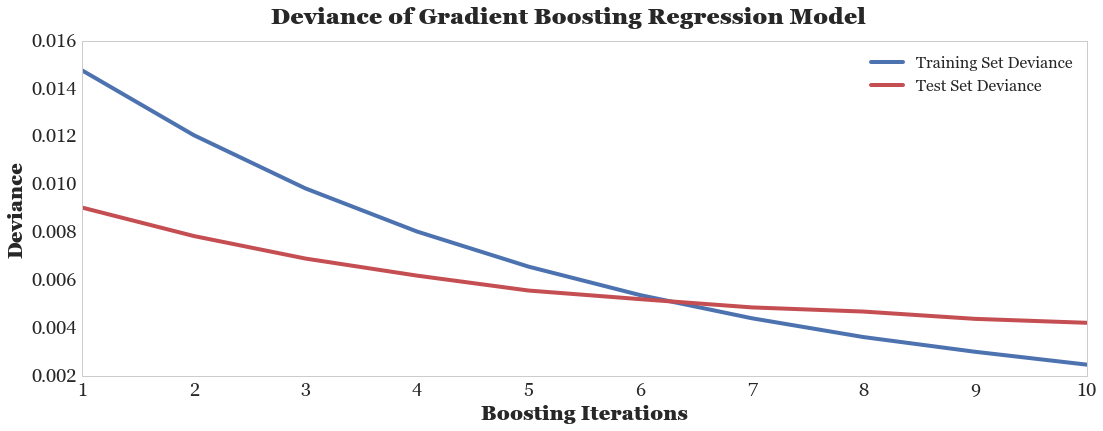

In [267]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(18, 6))
plt.suptitle('Deviance of Gradient Boosting Regression Model',fontsize=22)
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc=1, fontsize=16)
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

In [268]:
mse = mean_squared_error(y_test, clf.predict(X_test))
print("Gradient Boosting MSE: " ,mse)

Gradient Boosting MSE:  0.00423302213417


# Thoughts

So far I have demonstrated the following:

- There is a tangible signal in the dynamic networks as demonstrated by the various traditional metrics.
- No one traditional metric is able to characterise all the variations in the signal observed.
- We can derive a large range of plausible attributes from the graph matrices with the attributes from the Normalised Graph Laplacian being the most stable.
- These attributes when calculated from the Normalised Laplacian are well correlated to the traditional meausres but are more sensitive for e.g the Instantaneous Amplitude attribute is able to capture the large as well as the small peaks which require atleast the Degree, Betweeness and Closeness Centrality to dilineate.
- When utilising these attributes the variability is more important than SNR as demonstrated by the plots of the attributes of the Modularity Matrix that even though they appear more robust they fail to capture the trends in the data and therefore are not useful in this analysis. 
- I have also shown that the Emergence measure is a good way to meaningfully merge the various attributes presented and captures the dynamics of the network very well.
- With regards to the Emergence measure for display purposes it is more useful to look at the cosine of the attribute as it scales the value to [-1,+1] and the polarity is better constrained making interpretation easier
- As a way to assess the usefullness of these attributes further I tested how significant they are in predicting the Average Degree of a network. This is done with a gradient boosting regressor with a 50/50 test/train split to prevent overfitting from the small sample size. It appears that the derived attributes are very useful in predicting future structure of the network. It could be that these attributes are capturing the dynamic of the network reasonably well to achieve relatively good performance in predicting the Avg Deg value. Therefore these attributes could be utilised to predict some fundamental network property in a timestep in the future.
